<a href="https://colab.research.google.com/github/matuzaite/stu148444/blob/main/Cyberbullying_Detection_System_on_Social_Media_Artefact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = "cyberbullying_tweets.csv"
df = pd.read_csv(file_path)

# Basic information
basic_info = {
    "Shape": df.shape,
    "Column Names": df.columns.tolist(),
    "Missing Values": df.isnull().sum(),
    "Duplicate Rows": df.duplicated().sum(),
    "Class Distribution": df['cyberbullying_type'].value_counts()
}

# Show sample records
sample_records = df.sample(5, random_state=42)

basic_info, sample_records

({'Shape': (47692, 2),
  'Column Names': ['tweet_text', 'cyberbullying_type'],
  'Missing Values': tweet_text            0
  cyberbullying_type    0
  dtype: int64,
  'Duplicate Rows': np.int64(36),
  'Class Distribution': cyberbullying_type
  religion               7998
  age                    7992
  gender                 7973
  ethnicity              7961
  not_cyberbullying      7945
  other_cyberbullying    7823
  Name: count, dtype: int64},
                                               tweet_text   cyberbullying_type
 40362  @Goree_JuhssGuns hahaha he ain't even worth my...            ethnicity
 15019  RT @hsaymssik: Sucks to have the smile wiped o...               gender
 46321  Just a reminder, it's absolutely disgusting to...            ethnicity
 23927  RT @BuzzFeedUK: When you accidentally open you...  other_cyberbullying
 1640               Loving the look of the fritters! #mkr    not_cyberbullying)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Step 1: Drop duplicates
df_clean = df.drop_duplicates()

# Step 2-5: Text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+|#\w+", '', text)  # Remove mentions and hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df_clean['clean_text'] = df_clean['tweet_text'].apply(clean_text)

# Encode labels
df_clean['label'] = df_clean['cyberbullying_type'].astype('category').cat.codes
label_mapping = dict(enumerate(df_clean['cyberbullying_type'].astype('category').cat.categories))

# Show results
df_clean[['tweet_text', 'clean_text', 'cyberbullying_type', 'label']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-2-2736041600>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clean_text'] = df_clean['tweet_text'].apply(clean_text)
<ipython-input-2-2736041600>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['label'] = df_clean['cyberbullying_type'].as

,tweet_text,clean_text,cyberbullying_type,label
0,"In other words #katandandre, your food was cra...",word food crapilicious,not_cyberbullying,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,white,not_cyberbullying,3
2,@XochitlSuckkks a classy whore? Or more red ve...,classy whore red velvet cupcake,not_cyberbullying,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",meh p thanks head concerned another angry dude...,not_cyberbullying,3
4,@RudhoeEnglish This is an ISIS account pretend...,isi account pretending kurdish account like is...,not_cyberbullying,3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_clean['clean_text'], df_clean['label'], test_size=0.2, random_state=42, stratify=df_clean['label']
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = lr_model.predict(X_test_tfidf)

# Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display the dataframe using a standard method
print("Logistic Regression Evaluation Report:")
print(report_df)

Logistic Regression Evaluation Report:
              precision    recall  f1-score      support
0              0.945566  0.967459  0.956387  1598.000000
1              0.973418  0.966080  0.969735  1592.000000
2              0.894406  0.804403  0.847020  1590.000000
3              0.555761  0.568368  0.561994  1587.000000
4              0.564042  0.613419  0.587695  1565.000000
5              0.960307  0.937500  0.948767  1600.000000
accuracy       0.810428  0.810428  0.810428     0.810428
macro avg      0.815583  0.809538  0.811933  9532.000000
weighted avg   0.816619  0.810428  0.812898  9532.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluation
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose()

print("Random Forest Evaluation Report:")
print(rf_report_df)

Random Forest Evaluation Report:
              precision    recall  f1-score      support
0              0.982267  0.970588  0.976393  1598.000000
1              0.984829  0.978643  0.981727  1592.000000
2              0.882907  0.825157  0.853056  1590.000000
3              0.518519  0.485192  0.501302  1587.000000
4              0.524780  0.608946  0.563739  1565.000000
5              0.964646  0.955000  0.959799  1600.000000
accuracy       0.804868  0.804868  0.804868     0.804868
macro avg      0.809658  0.803921  0.806002  9532.000000
weighted avg   0.810841  0.804868  0.807075  9532.000000


In [ ]:
# Re-evaluate Logistic Regression using previously trained model and vectorizer
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions already done earlier for Logistic Regression
y_pred_lr = lr_model.predict(X_test_tfidf)

# Collect performance for each class
metrics = ['precision', 'recall', 'f1-score']
classes = sorted(df_clean['cyberbullying_type'].unique())

# Prepare comparison table
comparison_data = []

for i, class_name in enumerate(classes):
    lr_precision = precision_score(y_test, y_pred_lr, average=None, labels=[i])[0]
    rf_precision = precision_score(y_test, y_pred_rf, average=None, labels=[i])[0]

    lr_recall = recall_score(y_test, y_pred_lr, average=None, labels=[i])[0]
    rf_recall = recall_score(y_test, y_pred_rf, average=None, labels=[i])[0]

    lr_f1 = f1_score(y_test, y_pred_lr, average=None, labels=[i])[0]
    rf_f1 = f1_score(y_test, y_pred_rf, average=None, labels=[i])[0]

    comparison_data.append({
        'Class': class_name,
        'LR Precision': round(lr_precision, 3),
        'RF Precision': round(rf_precision, 3),
        'LR Recall': round(lr_recall, 3),
        'RF Recall': round(rf_recall, 3),
        'LR F1-Score': round(lr_f1, 3),
        'RF F1-Score': round(rf_f1, 3),
    })

# Convert to DataFrame for display
comparison_df = pd.DataFrame(comparison_data)
print("Model Comparison: Logistic Regression vs Random Forest:")
print(comparison_df)

Model Comparison: Logistic Regression vs Random Forest:
                 Class  LR Precision  RF Precision  LR Recall  RF Recall  \
0                  age         0.946         0.982      0.967      0.971   
1            ethnicity         0.973         0.985      0.966      0.979   
2               gender         0.894         0.883      0.804      0.825   
3    not_cyberbullying         0.556         0.519      0.568      0.485   
4  other_cyberbullying         0.564         0.525      0.613      0.609   
5             religion         0.960         0.965      0.938      0.955   

   LR F1-Score  RF F1-Score  
0        0.956        0.976  
1        0.970        0.982  
2        0.847        0.853  
3        0.562        0.501  
4        0.588        0.564  
5        0.949        0.960  


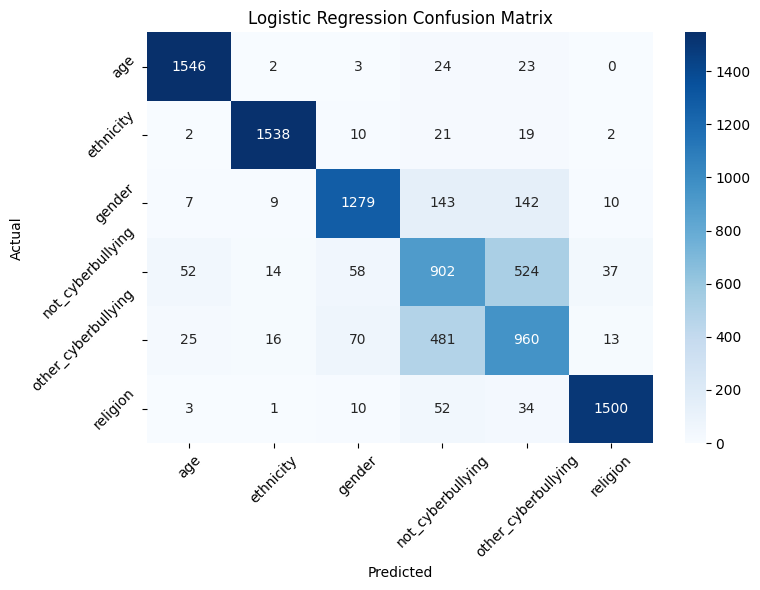

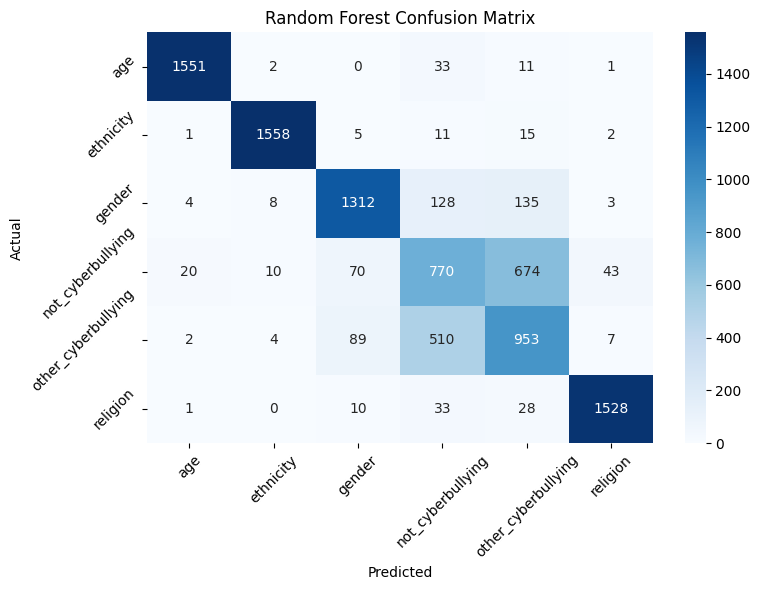

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Class labels for display
class_names = sorted(df_clean['cyberbullying_type'].unique())

# Plotting function
def plot_confusion_matrix(cm, title, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_lr, "Logistic Regression Confusion Matrix", class_names)
plot_confusion_matrix(cm_rf, "Random Forest Confusion Matrix", class_names)

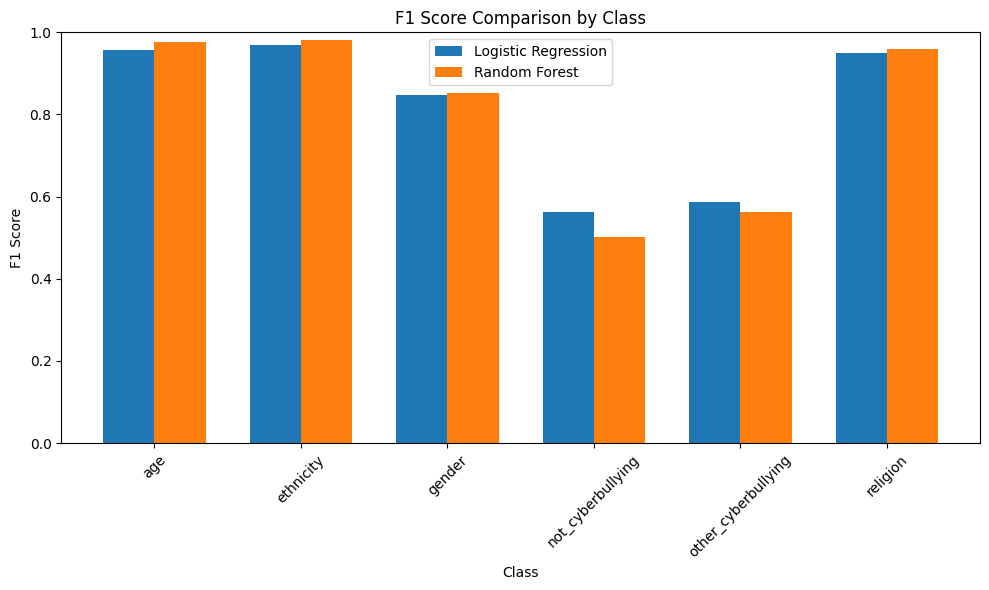

In [ ]:
# Prepare F1-score comparison data
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Get class labels
class_labels = sorted(df_clean['cyberbullying_type'].unique())

# Compute F1 scores
# Corrected variable names from y_pred_lr_small to y_pred_lr and y_pred_rf_small to y_pred_rf
f1_scores_lr = f1_score(y_test, y_pred_lr, average=None)
f1_scores_rf = f1_score(y_test, y_pred_rf, average=None)

# Create a DataFrame for plotting
f1_df = pd.DataFrame({
    'Class': class_labels,
    'Logistic Regression': f1_scores_lr,
    'Random Forest': f1_scores_rf
})

# Plot bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(f1_df))

plt.bar(index, f1_df['Logistic Regression'], bar_width, label='Logistic Regression')
plt.bar([i + bar_width for i in index], f1_df['Random Forest'], bar_width, label='Random Forest')

plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison by Class')
plt.xticks([i + bar_width / 2 for i in index], f1_df['Class'], rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

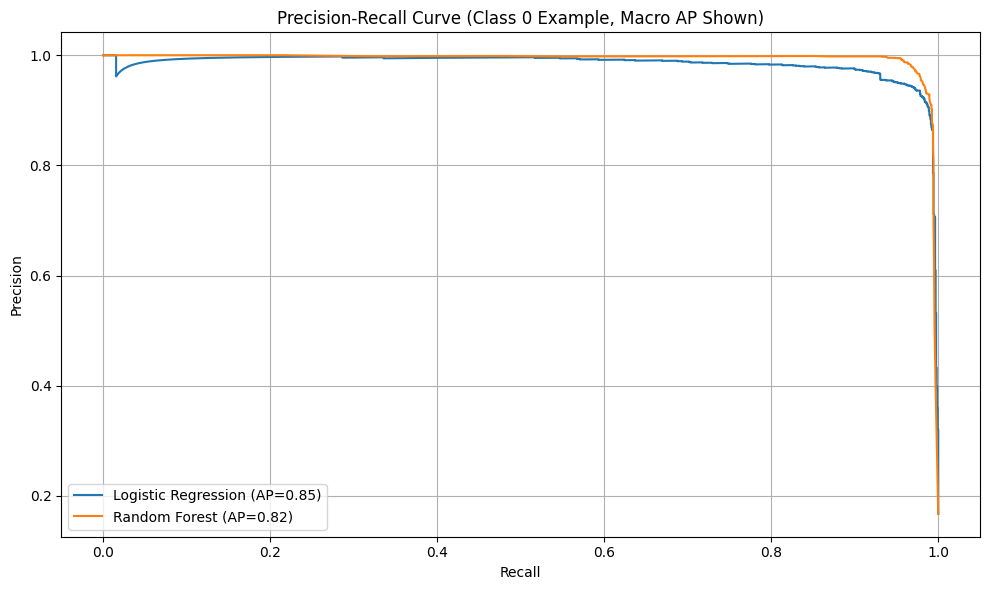

Model Performance Summary:
                 Metric  Logistic Regression  Random Forest
0     Precision (Macro)             0.815583       0.809658
1        Recall (Macro)             0.809538       0.803921
2      F1-Score (Macro)             0.811933       0.806002
3  Precision (Weighted)             0.816619       0.810841
4     Recall (Weighted)             0.810428       0.804868
5   F1-Score (Weighted)             0.812898       0.807075


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report # Import classification_report

# Binarize labels for multi-label PR plotting
y_test_bin = label_binarize(y_test, classes=range(len(class_labels)))

# Use the correct model variables and test data
# Corrected from lr_model_small to lr_model and X_test_small to X_test_tfidf
y_score_lr = lr_model.predict_proba(X_test_tfidf)
# Corrected from rf_model_small to rf_model and X_test_small to X_test_tfidf
y_score_rf = rf_model.predict_proba(X_test_tfidf)

# Plotting precision-recall curves for both models (macro average)
plt.figure(figsize=(10, 6))

for model_name, y_score in [('Logistic Regression', y_score_lr), ('Random Forest', y_score_rf)]:
    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(len(class_labels)):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    # Calculate macro average precision
    macro_ap = sum(average_precision.values()) / len(class_labels)
    # Plotting PR curve for each class and showing macro AP in the legend
    # You might want to plot the macro average curve instead, but this plots one curve per model
    # for clarity based on the original code structure, showing the macro AP in the legend.
    # If you want to plot macro average PR curve, you would calculate precision, recall for macro average here.
    # For simplicity, keeping the original structure of plotting class 0 curve and showing macro AP.
    plt.plot(recall[0], precision[0], label=f'{model_name} (AP={macro_ap:.2f})')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Class 0 Example, Macro AP Shown)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Overall model performance summary
# Use the correct predicted labels for the classification report
# Corrected from y_pred_lr_small to y_pred_lr and y_pred_rf_small to y_pred_rf
summary_lr = classification_report(y_test, y_pred_lr, output_dict=True)
summary_rf = classification_report(y_test, y_pred_rf, output_dict=True)

summary_df = pd.DataFrame({
    'Metric': ['Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)',
               'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)'],
    'Logistic Regression': [
        summary_lr['macro avg']['precision'],
        summary_lr['macro avg']['recall'],
        summary_lr['macro avg']['f1-score'],
        summary_lr['weighted avg']['precision'],
        summary_lr['weighted avg']['recall'],
        summary_lr['weighted avg']['f1-score'],
    ],
    'Random Forest': [
        summary_rf['macro avg']['precision'],
        summary_rf['macro avg']['recall'],
        summary_rf['macro avg']['f1-score'],
        summary_rf['weighted avg']['precision'],
        summary_rf['weighted avg']['recall'],
        summary_rf['weighted avg']['f1-score'],
    ]
})

print("Model Performance Summary:")
print(summary_df)

<ipython-input-18-2042457551>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


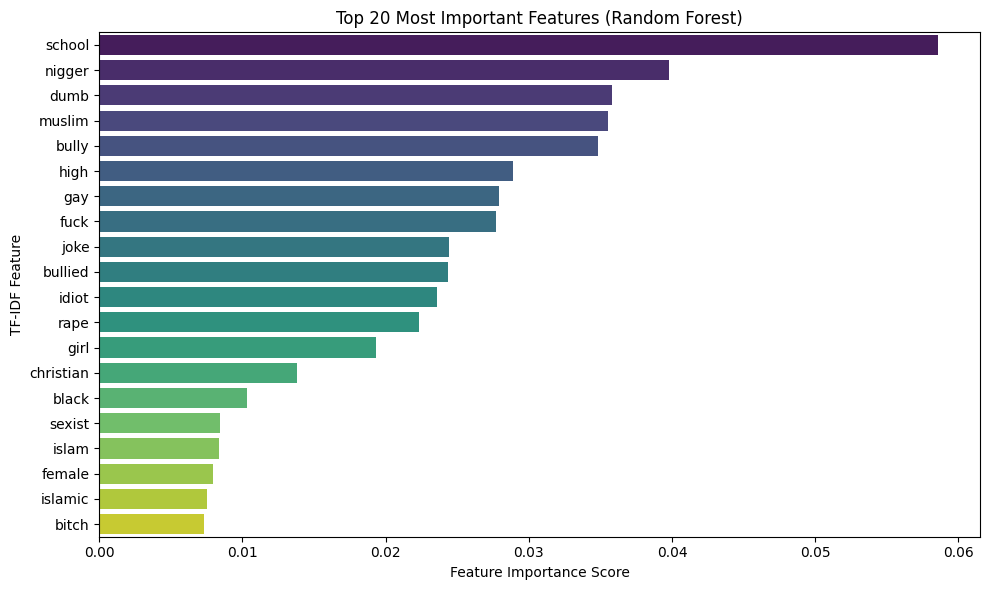

In [ ]:
# Extract feature importances from Random Forest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names and importances
# Corrected variable name from vectorizer_small to vectorizer
feature_names = vectorizer.get_feature_names_out()
# Corrected variable name from rf_model_small to rf_model
importances = rf_model.feature_importances_

# Combine and sort
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

# Plot top 20 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('TF-IDF Feature')
plt.tight_layout()
plt.show()